# Q2

In [29]:
import cv2 # just for reading the image 
import numpy as np 
import matplotlib.pyplot as plt
import queue

read image "q2.png"

In [30]:
img = cv2.imread('images/q2.png')

plot the image

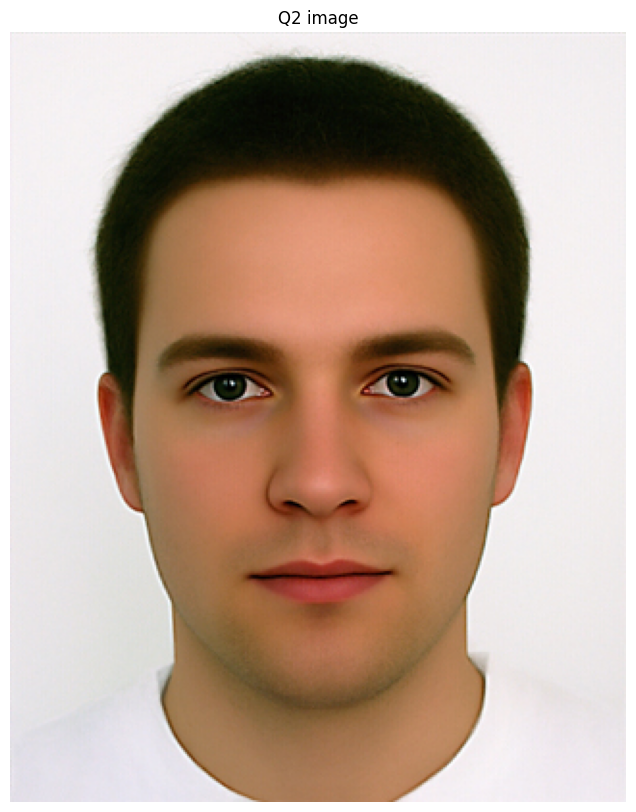

In [31]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Q2 image')
plt.axis('off')
plt.show()

In [32]:
def segment(image, seed_point, threshold, neighbor_mode=0):
    color = (255, 0, 0)
    height, width = image.shape[:2]
    segmented_image = image.copy()
    visited = np.zeros((height, width), dtype=bool)
    q = queue.Queue()
    q.put(seed_point)
    visited[seed_point[1], seed_point[0]] = True
    seed_color = image[seed_point[1], seed_point[0]].astype(np.float32)

    # Define neighbor offsets based on connectivity mode
    if neighbor_mode == 0:  # 4-connectivity
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    else:  # 8-connectivity
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]

    while not q.empty():
        y, x = q.get()
        segmented_image[y, x] = color

        for dy, dx in neighbors:
            ny, nx = y + dy, x + dx

            if 0 <= ny < height and 0 <= nx < width and not visited[ny, nx]:
                current_color = image[ny, nx].astype(np.float32)
                color_diff = np.abs(current_color - seed_color).mean()
                if color_diff <= threshold:
                    q.put((ny, nx))
                    visited[ny, nx] = True

    return segmented_image


In [33]:
seed_point = (200, 200)
threshold = [20,40,60,80]

In [34]:
segmented_images_4 =[]
segmented_images_8 =[] 

for i in threshold:
    segmented_images_4.append(segment(img, seed_point, i, neighbor_mode=0))
    segmented_images_8.append(segment(img, seed_point, i, neighbor_mode=1))


plot the results and compare them

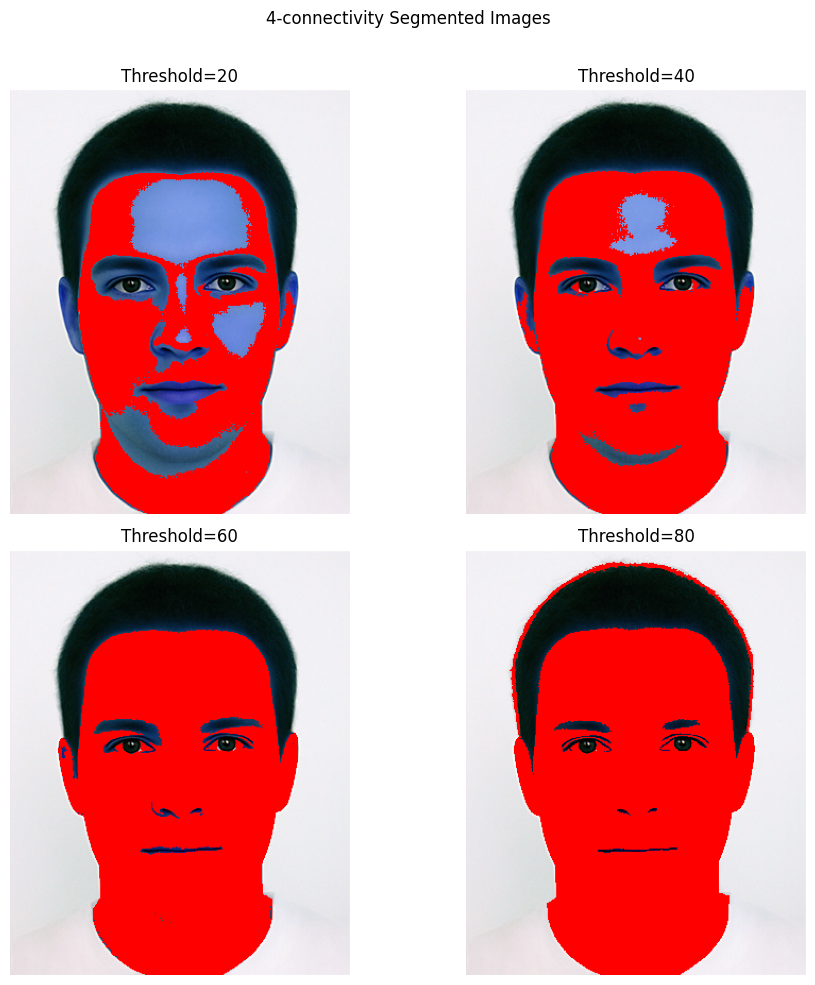

In [35]:
fig_4, axs_4 = plt.subplots(2, 2, figsize=(10, 10))
fig_4.suptitle('4-connectivity Segmented Images')

for idx, ax in enumerate(axs_4.flat):
    if idx < len(segmented_images_4):
        ax.imshow(segmented_images_4[idx])
        ax.set_title(f'Threshold={threshold[idx]}')
        ax.axis('off')

fig_4.tight_layout()
fig_4.subplots_adjust(top=0.9)
plt.show()


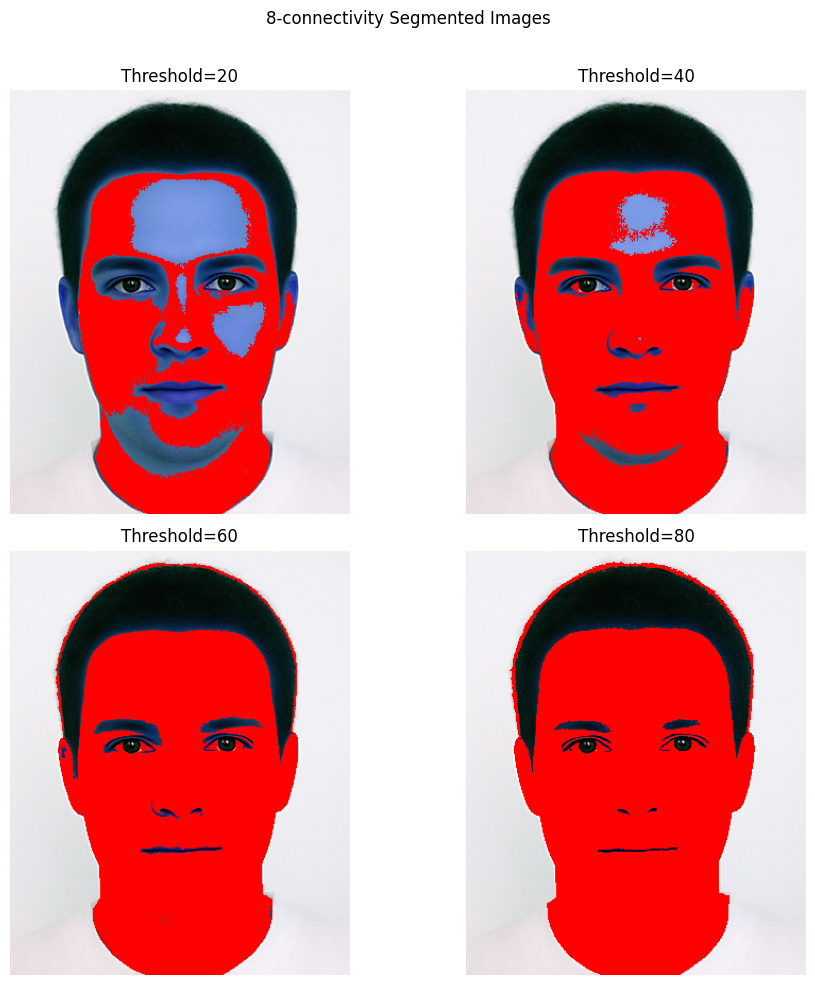

In [36]:
fig_8, axs_8 = plt.subplots(2, 2, figsize=(10, 10))
fig_8.suptitle('8-connectivity Segmented Images')

for idx, ax in enumerate(axs_8.flat):
    if idx < len(segmented_images_8):
        ax.imshow(segmented_images_8[idx])
        ax.set_title(f'Threshold={threshold[idx]}')
        ax.axis('off')

fig_8.tight_layout()
fig_8.subplots_adjust(top=0.9)
plt.show()
